# Testing Neural Net
- Need to add unknown class as NN isn't accurate enough
- Need to make it more conservative with predictions

## Outcome

In [12]:
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.13 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.4.1
OS Darwin 16.6.0 x86_64 i386 64bit
numpy 1.13.0
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.2
Mon Jul 03 21:59:23 2017 AEST

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import glob
import copy
import random

import os
import sys

sys.path.append("../src")
from images_permute import processing_pipeline

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import glob
import copy

import os
import sys
import glob
import hashlib

#sys.path.append("../src")
#from images_permute import processing_pipeline

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

In [37]:
list_image_directory_paths = glob.glob('/Users/jacksimpson/Data/beeunique/output/All2/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/Users/jacksimpson/Data/beeunique/output/All/0/', 65)


In [5]:
kernel_size = 3
sig = 1.0
th = 0.2
lm = 3.0
gm = 1.5
ps = 0

kernel = cv2.getGaborKernel((kernel_size, kernel_size), sig, th, lm, gm, ps)

In [6]:
class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    class_images_dict[image_class_name] = []
    
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        #image = cv2.medianBlur(image, 3);
        #image = cv2.filter2D(image, cv2.CV_32F, kernel)
        class_images_dict[image_class_name].append(image)

('0', '/Users/jacksimpson/Data/beeunique/output/All2/0/')
('1', '/Users/jacksimpson/Data/beeunique/output/All2/1/')
('2', '/Users/jacksimpson/Data/beeunique/output/All2/2/')
('3', '/Users/jacksimpson/Data/beeunique/output/All2/3/')
('4', '/Users/jacksimpson/Data/beeunique/output/All2/4/')
('5', '/Users/jacksimpson/Data/beeunique/output/All2/5/')
('6', '/Users/jacksimpson/Data/beeunique/output/All2/6/')
('7', '/Users/jacksimpson/Data/beeunique/output/All2/7/')
('8', '/Users/jacksimpson/Data/beeunique/output/All2/8/')
('a', '/Users/jacksimpson/Data/beeunique/output/All2/a/')
('AA', '/Users/jacksimpson/Data/beeunique/output/All2/AA/')
('Ampersand', '/Users/jacksimpson/Data/beeunique/output/All2/Ampersand/')
('Ankh', '/Users/jacksimpson/Data/beeunique/output/All2/Ankh/')
('ArrowLine', '/Users/jacksimpson/Data/beeunique/output/All2/ArrowLine/')
('Asterisk', '/Users/jacksimpson/Data/beeunique/output/All2/Asterisk/')
('Circle_Line', '/Users/jacksimpson/Data/beeunique/output/All2/Circle_Line/'

In [7]:
len(class_images_dict['AA'])

4868

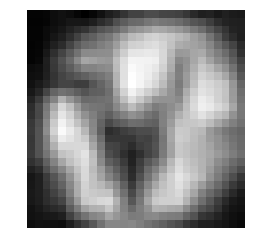

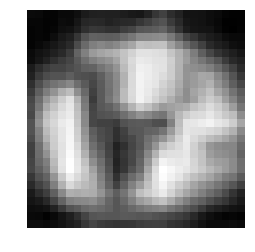

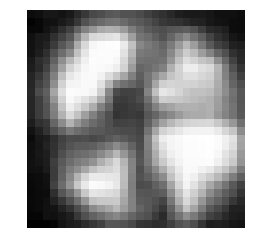

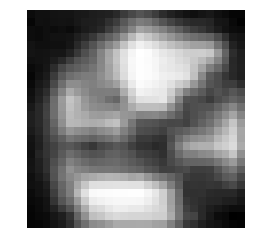

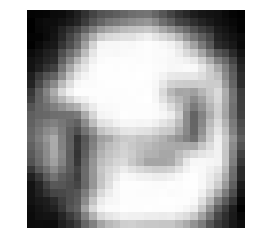

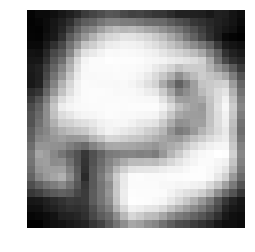

In [8]:
for i in range(2):
    view(class_images_dict['AA'][i])

for i in range(2):
    view(class_images_dict['KK'][i])
    
for i in range(2):
    view(class_images_dict['2'][i])

In [9]:
def norm_image(image):
    image[image < 0] = 0
    image[image > 255] = 255
    return np.uint8(image)

def add_noise(image, n_or_u):
    noise = np.zeros((28,28), np.uint8)
    if n_or_u == 'n':
        cv2.randn(noise, 30, 2)
    else:
        cv2.randu(noise, 20, 2)
    noisy_image = np.uint32(image) + noise
    noisy_image[noisy_image < 0] = 0
    noisy_image[noisy_image > 255] = 255
    noisy_image = np.uint8(noisy_image)
    return noisy_image

def rotate_image(image):
    rotated_images = []
    for angle in range(90, 360, 90):
        M = cv2.getRotationMatrix2D((14,14),angle,1)
        r = cv2.warpAffine(image,M,(28,28))
        rotated_images.append(r)
    return rotated_images

def change_brightness_contrast(image):
    image_int32 = np.int32(image)
    increase_brightness = norm_image(image_int32 + 80)
    decrease_brightness = norm_image(image_int32 - 80)
    return [increase_brightness, decrease_brightness]
    
def occlude_edges(image):
    full_size = np.zeros((28, 28), dtype=np.uint8)
    full_size[2:26, 2:26] = image[2:26, 2:26]
    return full_size

def mean_smooth(image):
    mean_smoothed = cv2.blur(image, (3, 3))
    return mean_smoothed

In [10]:
X = []
image_class_names_index = 0
image_class_names = {}
y = []

for tag_class in class_images_dict.keys():
    print(tag_class, len(class_images_dict[tag_class]))
    image_class_names[image_class_names_index] = tag_class
    for tag in class_images_dict[tag_class]:
        generated_images = [tag, add_noise(occlude_edges(tag), 'u')]
        generated_images.extend(change_brightness_contrast(tag))
        generated_images.extend(rotate_image(tag))
        X.extend(generated_images)
        y.extend([image_class_names_index] * len(generated_images))
    image_class_names_index += 1
    
X = np.array(X)
y = np.array(y)

('Trident', 3000)
('Leaf', 3000)
('Note1', 3000)
('DD', 3000)
('Peace', 3000)
('Question', 3000)
('Pillars', 3000)
('HH', 3000)
('Ampersand', 3000)
('JJ', 3000)
('Notes2', 3000)
('Plant', 3000)
('Hash', 3000)
('Power', 3000)
('0', 4003)
('Ankh', 3000)
('TT', 3000)
('HollowArrow', 3000)
('Asterisk', 3000)
('UU', 3000)
('Lines3', 3000)
('1', 3000)
('ArrowLine', 5694)
('3', 3000)
('2', 4124)
('5', 3000)
('4', 3870)
('7', 3000)
('6', 3000)
('8', 3000)
('Omega', 3000)
('CircleCross', 3000)
('AA', 4868)
('SS', 3671)
('Circle_Line', 3000)
('Radioactive', 3000)
('Tadpole', 3000)
('EE', 3000)
('RR', 3000)
('PP', 3000)
('GG', 3000)
('XX', 4939)
('ZZ', 3817)
('Necklace', 3000)
('Triangle', 3000)
('Umbrella', 3000)
('Dot', 3000)
('a', 4905)
('Heart', 3000)
('e', 3000)
('Halfcircle', 3000)
('g', 3000)
('f', 3000)
('KK', 5178)
('h', 3000)
('Queen', 3564)
('Plane', 3000)
('n', 3000)
('MM', 4626)
('r', 3000)
('w', 3000)
('y', 4421)
('Scissors', 3000)


In [11]:
print(X.shape, y.shape)
print(set(y))
print(image_class_names[1])

((1453760, 28, 28), (1453760,))
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])
Leaf


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((1163008, 28, 28), (1163008,), (290752, 28, 28), (290752,))


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [14]:
Y_train = np_utils.to_categorical(y_train, len(set(y_train)))
Y_test = np_utils.to_categorical(y_test, len(set(y_train)))

In [15]:
img_rows = 28
img_cols = 28

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train.shape

(1163008, 28, 28, 1)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
model = Sequential()
# input layer
#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28))) # if theano backend
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(63, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
1163008/1163008 [==============================] - 976s - loss: 1.0729 - acc: 0.6829   
Epoch 2/5
1163008/1163008 [==============================] - 912s - loss: 0.6771 - acc: 0.7997   
Epoch 3/5
1163008/1163008 [==============================] - 930s - loss: 0.5950 - acc: 0.8253   
Epoch 4/5
1163008/1163008 [==============================] - 932s - loss: 0.5533 - acc: 0.8377   
Epoch 5/5
1163008/1163008 [==============================] - 929s - loss: 0.5356 - acc: 0.8439   


In [21]:
model.save('model.h5')

In [22]:
print(image_class_names)

{0: 'Trident', 1: 'Leaf', 2: 'Note1', 3: 'DD', 4: 'Peace', 5: 'Question', 6: 'Pillars', 7: 'HH', 8: 'Ampersand', 9: 'JJ', 10: 'Notes2', 11: 'Plant', 12: 'Hash', 13: 'Power', 14: '0', 15: 'Ankh', 16: 'TT', 17: 'HollowArrow', 18: 'Asterisk', 19: 'UU', 20: 'Lines3', 21: '1', 22: 'ArrowLine', 23: '3', 24: '2', 25: '5', 26: '4', 27: '7', 28: '6', 29: '8', 30: 'Omega', 31: 'CircleCross', 32: 'AA', 33: 'SS', 34: 'Circle_Line', 35: 'Radioactive', 36: 'Tadpole', 37: 'EE', 38: 'RR', 39: 'PP', 40: 'GG', 41: 'XX', 42: 'ZZ', 43: 'Necklace', 44: 'Triangle', 45: 'Umbrella', 46: 'Dot', 47: 'a', 48: 'Heart', 49: 'e', 50: 'Halfcircle', 51: 'g', 52: 'f', 53: 'KK', 54: 'h', 55: 'Queen', 56: 'Plane', 57: 'n', 58: 'MM', 59: 'r', 60: 'w', 61: 'y', 62: 'Scissors'}
